In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [5]:
from google.colab import files
uploaded= files.upload()

Saving Fake.csv to Fake.csv


In [6]:
from google.colab import files
uploaded= files.upload()

Saving True.csv to True.csv


In [7]:
true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")
true['label'] = 'REAL'
fake['label'] = 'FAKE'
df = pd.concat([true, fake])
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB
None
label
FAKE    23481
REAL    21417
Name: count, dtype: int64


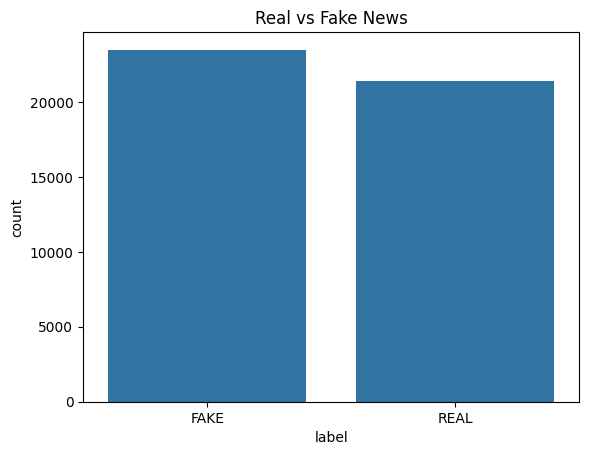

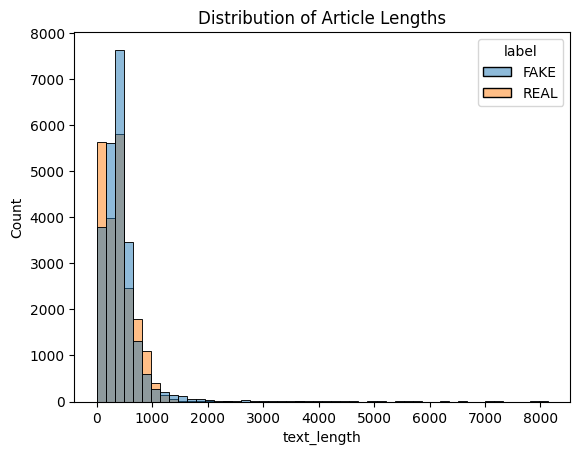

In [8]:
print(df.info())
print(df['label'].value_counts())

# Visualize class distribution
sns.countplot(x='label', data=df)
plt.title("Real vs Fake News")
plt.show()

# Word count distribution
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(data=df, x='text_length', hue='label', bins=50)
plt.title("Distribution of Article Lengths")
plt.show()


In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Needed once

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.99


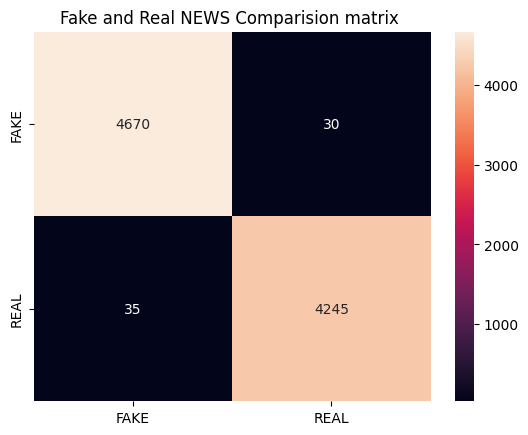

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df['clean_text'] contains preprocessed text and df['label'] contains 'FAKE' or 'REAL'
X = df['clean_text']
y = df['label']

# Split data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

# Train the model
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

cm = confusion_matrix(y_test, y_pred, labels=["FAKE", "REAL"])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["FAKE", "REAL"], yticklabels=["FAKE", "REAL"])
plt.title("Fake and Real NEWS Comparision matrix ")
plt.show()


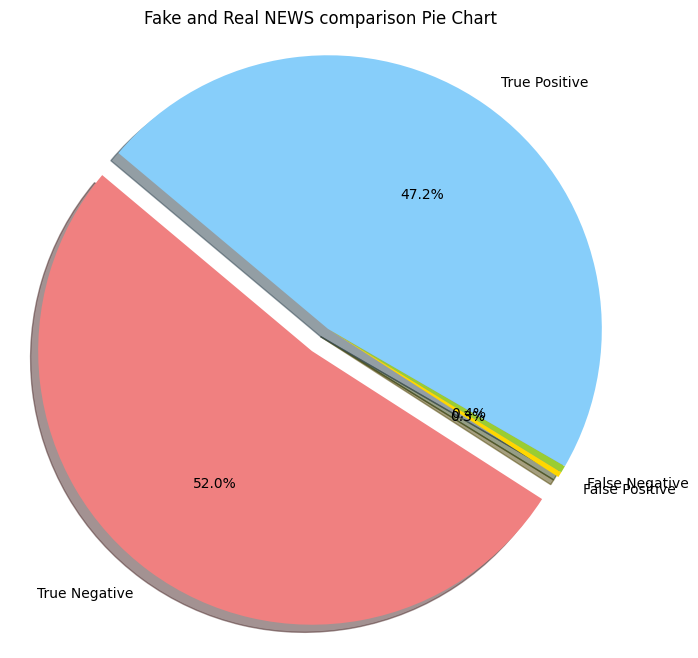

In [19]:
tn, fp, fn, tp = cm.ravel()

total = tn + fp + fn + tp
percentage_tn = (tn / total) * 100
percentage_fp = (fp / total) * 100
percentage_fn = (fn / total) * 100
percentage_tp = (tp / total) * 100

# Create labels and sizes for the pie chart
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
sizes = [percentage_tn, percentage_fp, percentage_fn, percentage_tp]
colors = ['lightcoral', 'gold', 'yellowgreen', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # Explode the first slice (True Negative)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Fake and Real NEWS comparison Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()